# Distribution Plots

## univariate

In [1]:
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


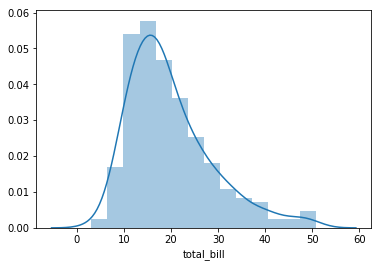

In [8]:
sns.distplot(tips['total_bill'])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


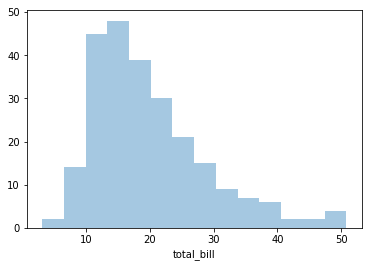

In [9]:
sns.distplot(tips['total_bill'],kde=False) #kde kernel density estimation

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


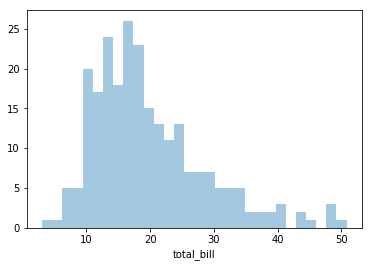

In [10]:
sns.distplot(tips['total_bill'],kde=False,bins=30)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


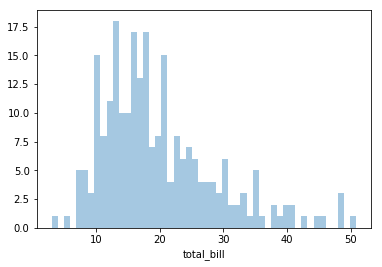

In [11]:
sns.jointplot(tips['total_bill'],kde=False,bins=30)

## bivariate

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


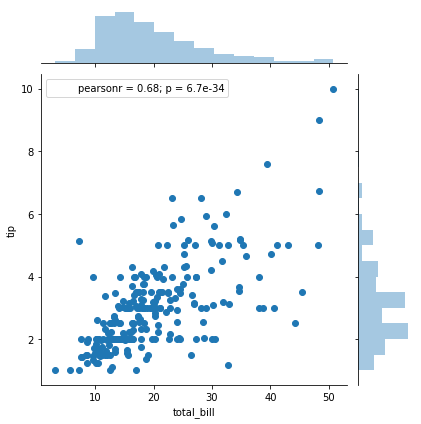

In [13]:
sns.jointplot(x='total_bill',y='tip',data=tips)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


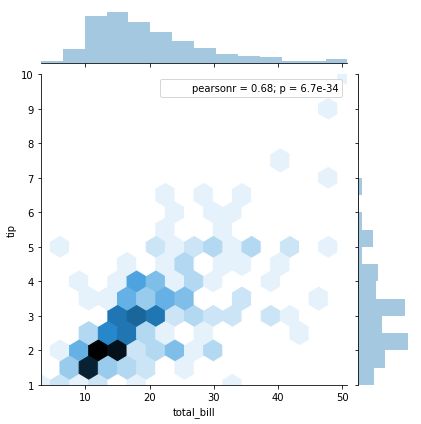

In [14]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


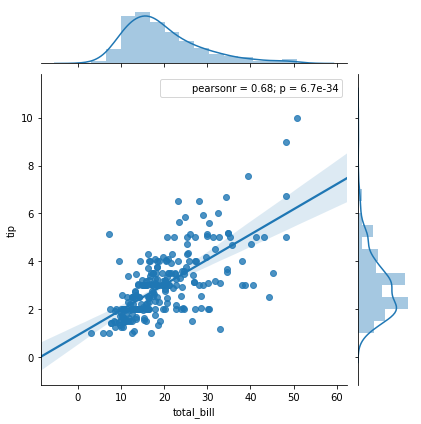

In [15]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg')

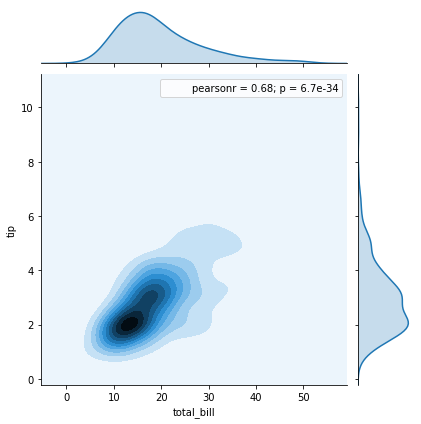

In [16]:
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

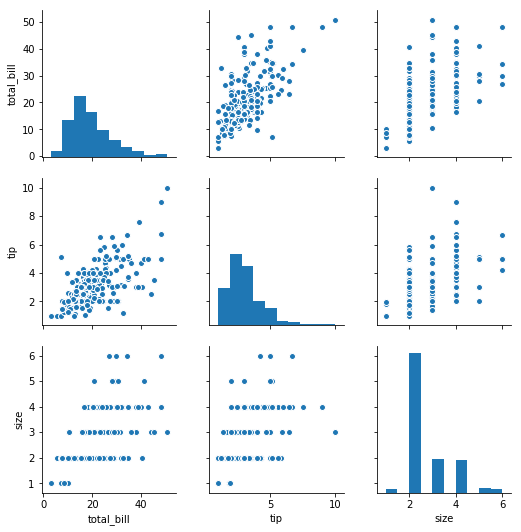

In [17]:
sns.pairplot(tips) #we are pushing in a full dataframe and seaborn is creating charts to compare all numeric columns

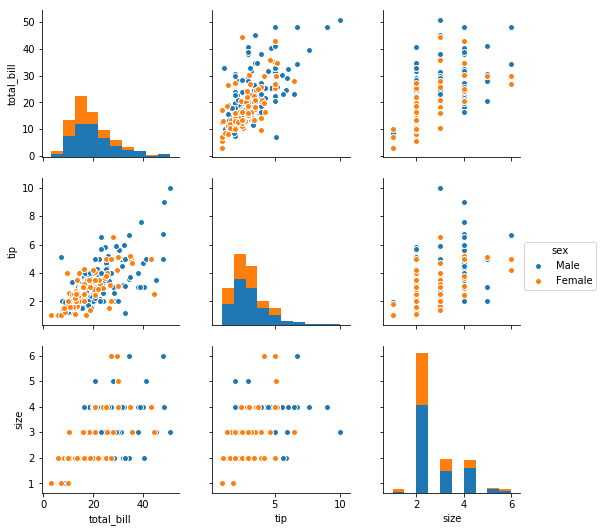

In [18]:
sns.pairplot(tips,hue='sex') #can split charts based on categories

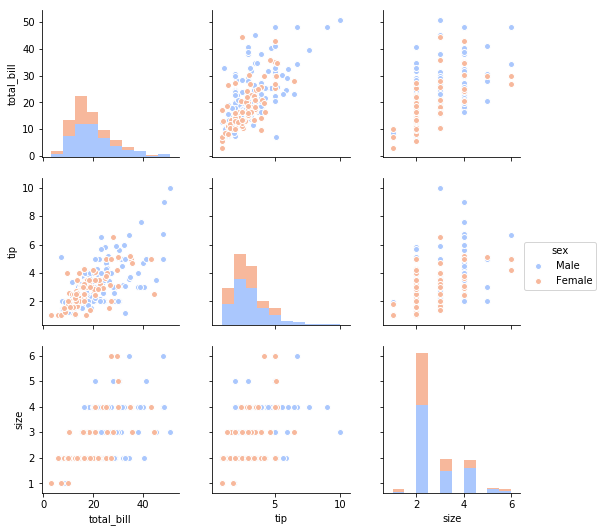

In [19]:
sns.pairplot(tips,hue='sex',palette='coolwarm') #can choose palette series

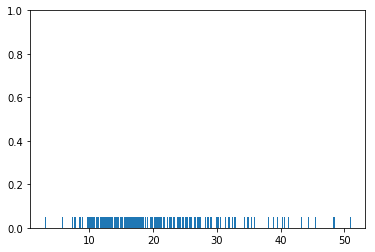

In [20]:
sns.rugplot(tips['total_bill']) #this plot helps explain the KDE plot

(0, 1)

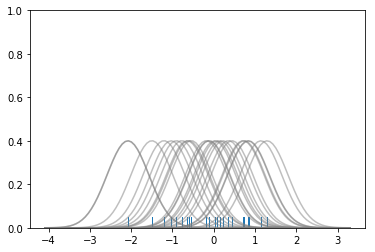

In [21]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sns.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

Text(0.5,0.98,'Sum of the Basis Functions')

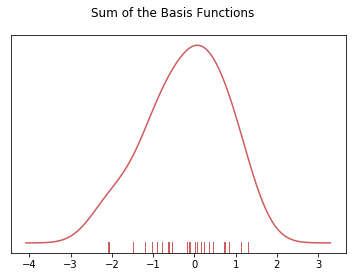

In [22]:
# To get the kde plot we can sum these basis functions.

# Plot the sum of the basis function
sum_of_kde = np.sum(kernel_list,axis=0)

# Plot figure
fig = plt.plot(x_axis,sum_of_kde,color='indianred')

# Add the initial rugplot
sns.rugplot(dataset,c = 'indianred')

# Get rid of y-tick marks
plt.yticks([])

# Set title
plt.suptitle("Sum of the Basis Functions")

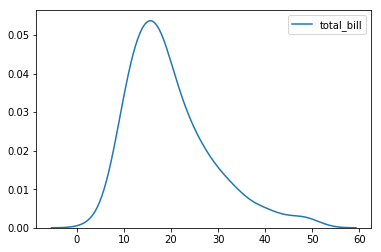

In [23]:
sns.kdeplot(tips['total_bill']) #can ask for just the kde plot

# Categorical Plots

In [1]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


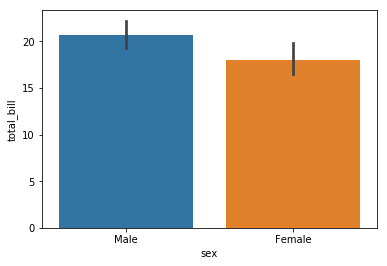

In [2]:
sns.barplot(x='sex',y='total_bill',data=tips)

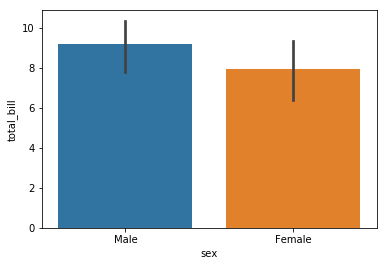

In [3]:
import numpy as np
sns.barplot(x='sex',y='total_bill',data=tips, estimator=np.std) 
#estimator can be used to choose what the values are. Default is mean as above chart.

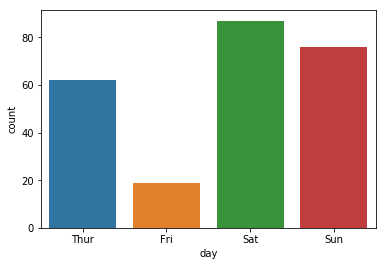

In [5]:
sns.countplot(x='day',data=tips) #records per value in dataset

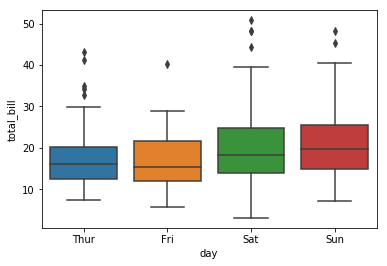

In [6]:
sns.boxplot(x='day',y='total_bill',data=tips)

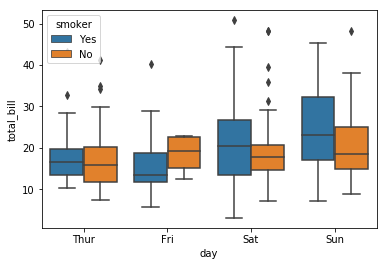

In [7]:
sns.boxplot(x='day',y='total_bill',data=tips,hue='smoker') #add extra dimension quickly

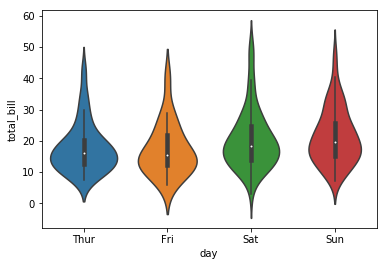

In [9]:
sns.violinplot(x='day',y='total_bill',data=tips) #shows kernel density distribution as well 

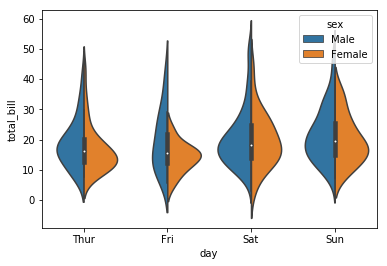

In [10]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='sex',split=True) #shows kernel density distribution per category

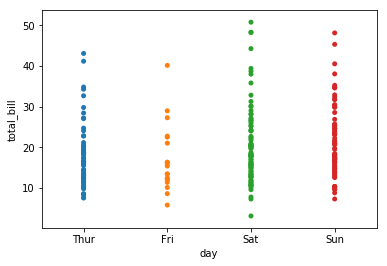

In [11]:
sns.stripplot(x='day',y='total_bill',data=tips)

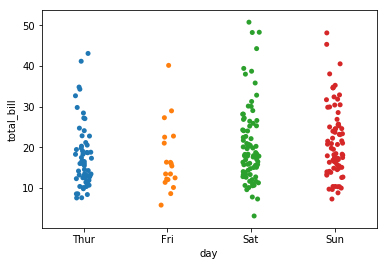

In [13]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True)#jitter shows a better sense of density

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2586: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


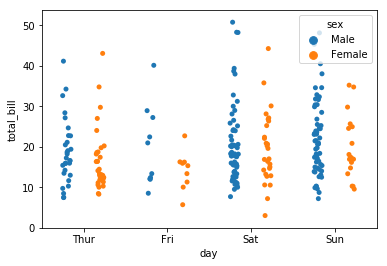

In [14]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',split=True)#can apply these too

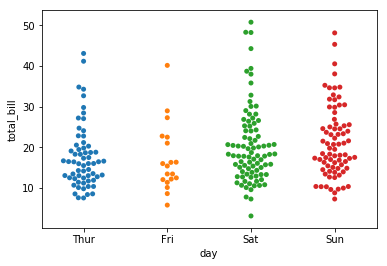

In [15]:
sns.swarmplot(x='day',y='total_bill',data=tips) #combo of strip and violin plot but doesn't scale well

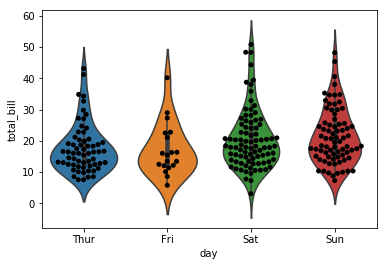

In [18]:
sns.violinplot(x='day',y='total_bill',data=tips)
sns.swarmplot(x='day',y='total_bill',data=tips,color='black') #can combine these two

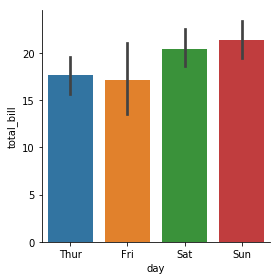

In [21]:
sns.factorplot(x='day',y='total_bill',data=tips,kind='bar')#can choose the kind of plot from point,bar,count,box,violin,strip

# Matrix Plots

In [24]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
flights = sns.load_dataset('flights')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [25]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [27]:
tc = tips.corr()

In [30]:
tc

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


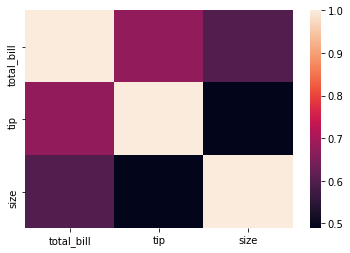

In [32]:
sns.heatmap(tc)

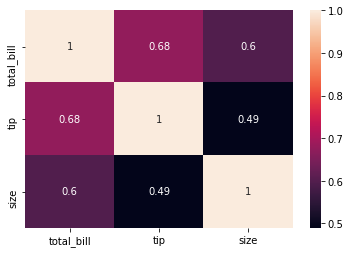

In [33]:
sns.heatmap(tc,annot=True)

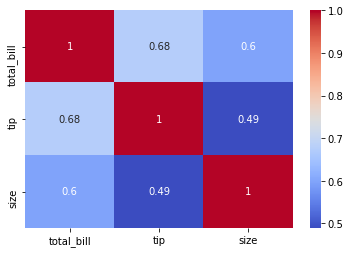

In [34]:
sns.heatmap(tc,annot=True,cmap='coolwarm')#cmap = colour scheme

In [36]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [37]:
flights.pivot_table(index='month',columns='year',values='passengers')

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
June,135,149,178,218,243,264,315,374,422,435,472,535
July,148,170,199,230,264,302,364,413,465,491,548,622
August,148,170,199,242,272,293,347,405,467,505,559,606
September,136,158,184,209,237,259,312,355,404,404,463,508


In [38]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')

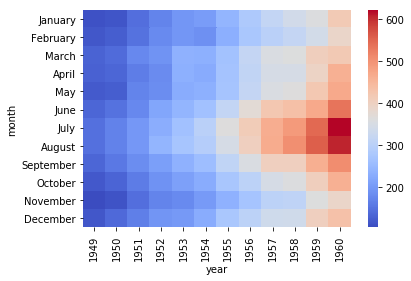

In [41]:
sns.heatmap(fp,cmap='coolwarm')

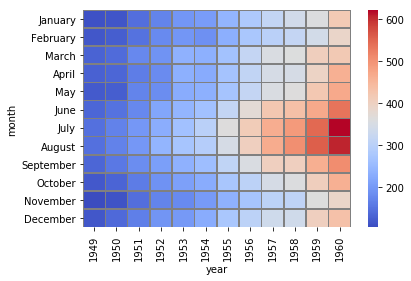

In [44]:
sns.heatmap(fp,cmap='coolwarm',linecolor='grey',linewidth=0.5)

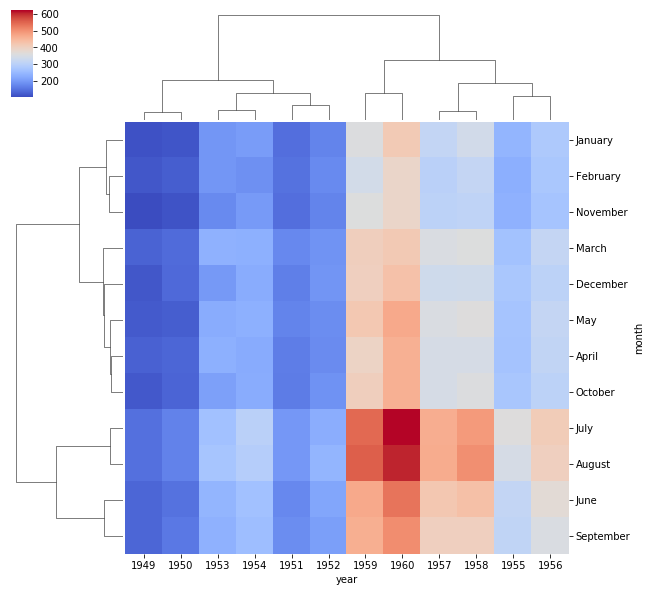

In [47]:
sns.clustermap(fp,cmap='coolwarm') 
#clustering is shown by tree diagrams on the sides e.g. July/August grouped inside larger group July/August/June/September

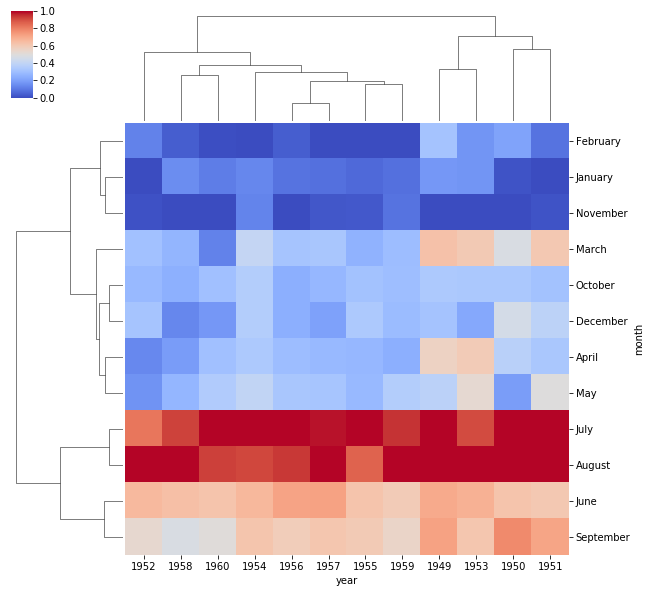

In [48]:
sns.clustermap(fp,cmap='coolwarm',standard_scale=1) #normalising the data allows for better visualisation of grouping

# Grids

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
iris = sns.load_dataset('iris') #creates pandas dataframe
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [65]:
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

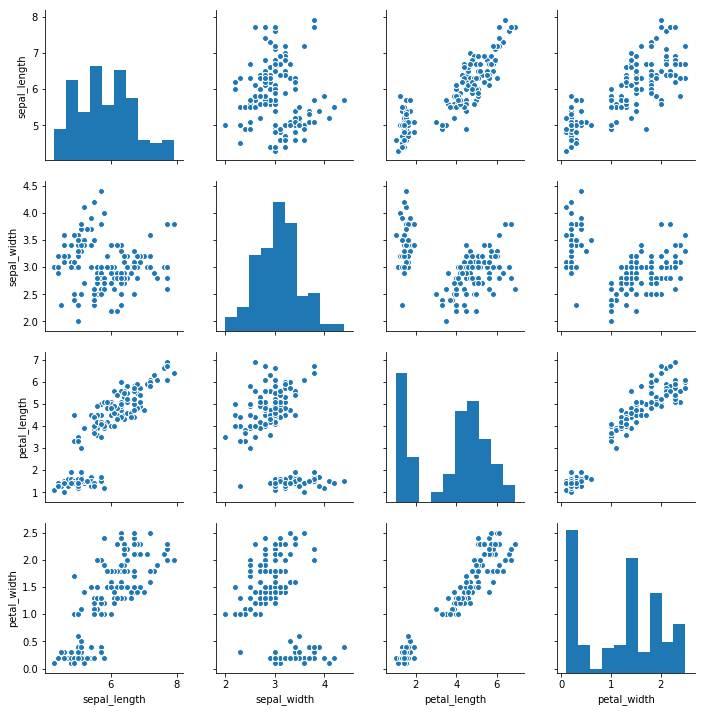

In [66]:
sns.pairplot(iris)

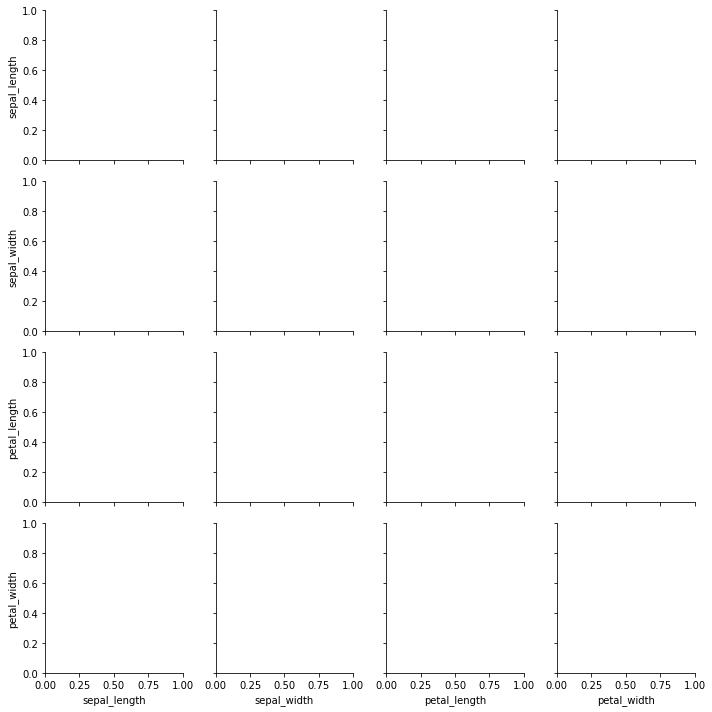

In [67]:
sns.PairGrid(iris) #gives you more control over pairplots

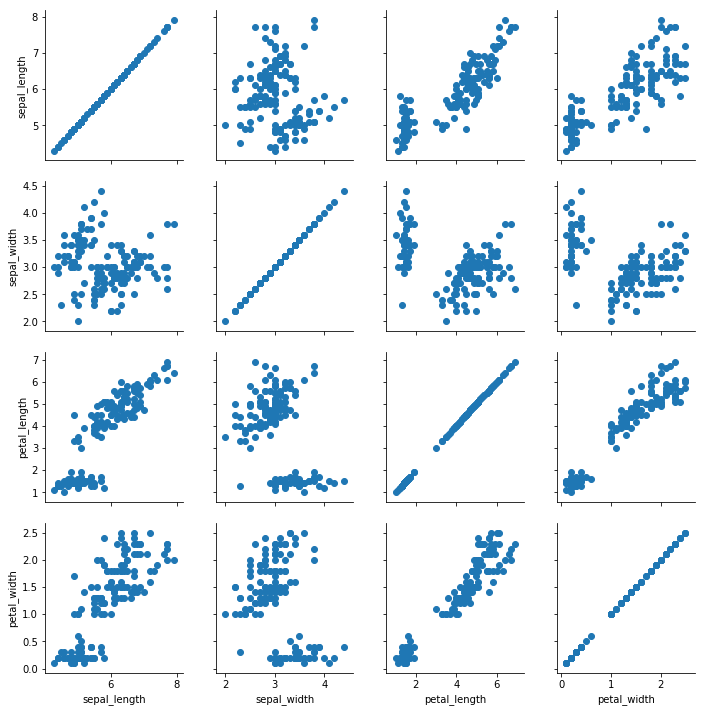

In [69]:
g = sns.PairGrid(iris) #gives you more control over pairplots
g.map(plt.scatter)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960

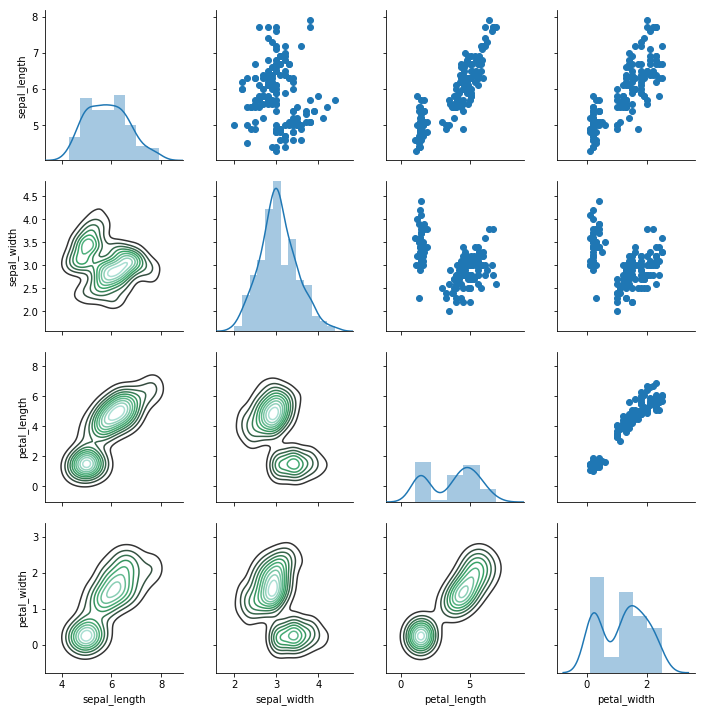

In [70]:
g = sns.PairGrid(iris) #gives you more control over pairplots
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

In [71]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


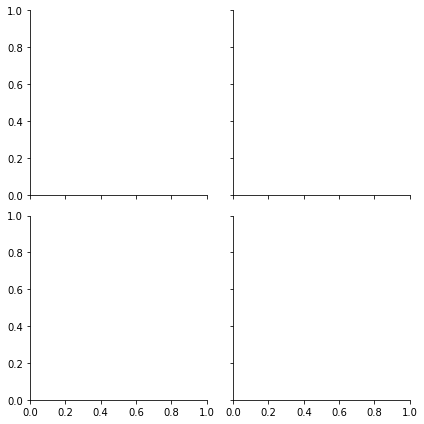

In [73]:
g = sns.FacetGrid(tips,col='time',row='smoker') #automatically picks up how many unique values in each and gives number of plots

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


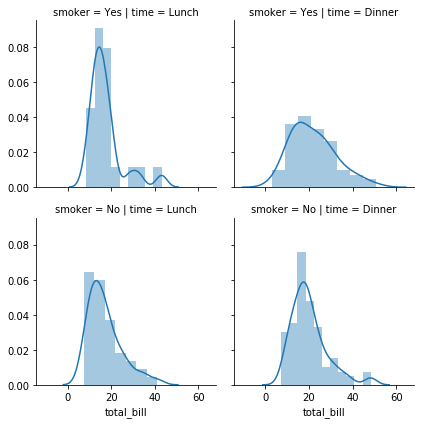

In [75]:
g = sns.FacetGrid(tips,col='time',row='smoker')
g.map(sns.distplot,'total_bill') #allows for a numeric column to shown against multiple values from multiple columns

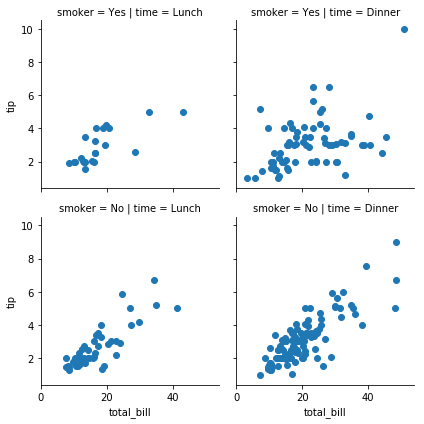

In [76]:
g = sns.FacetGrid(tips,col='time',row='smoker')
g.map(plt.scatter,'total_bill','tip')

# Regression Plots - linear model plots

In [77]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


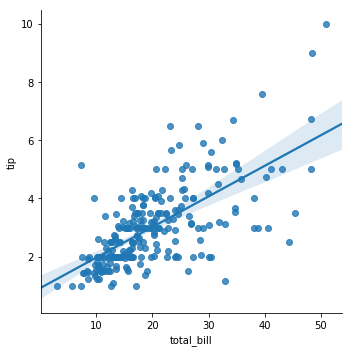

In [78]:
sns.lmplot(x='total_bill',y='tip',data=tips) #scatter and linear fit

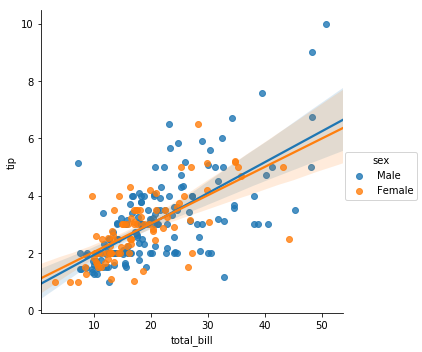

In [79]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex') #can use hue also

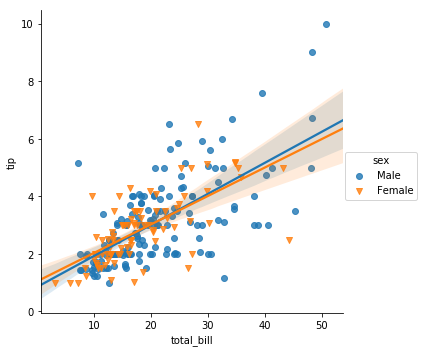

In [81]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v']) #can use matplotlib parameters on some charts

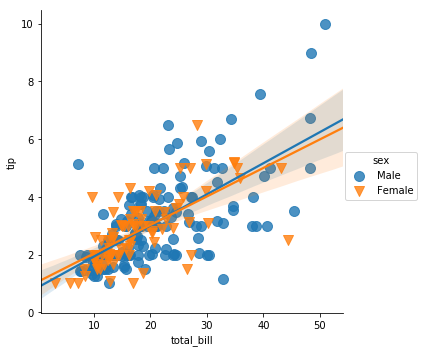

In [83]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['o','v'],scatter_kws={'s':100}) #can use matplotlib parameters on some charts

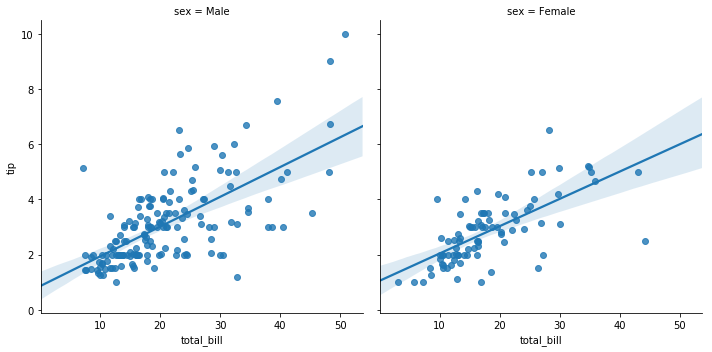

In [84]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex') #separate by columns and rows

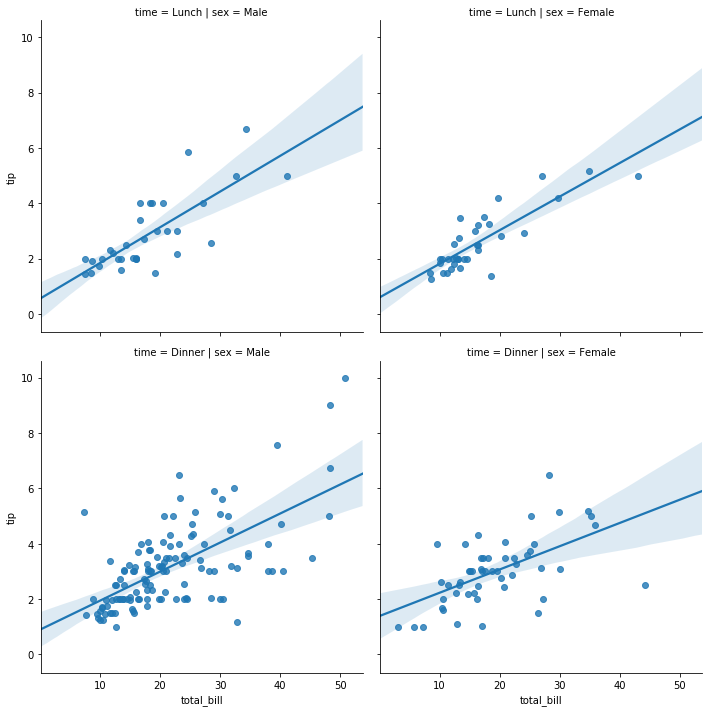

In [85]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='sex',row='time') #separate by columns and rows

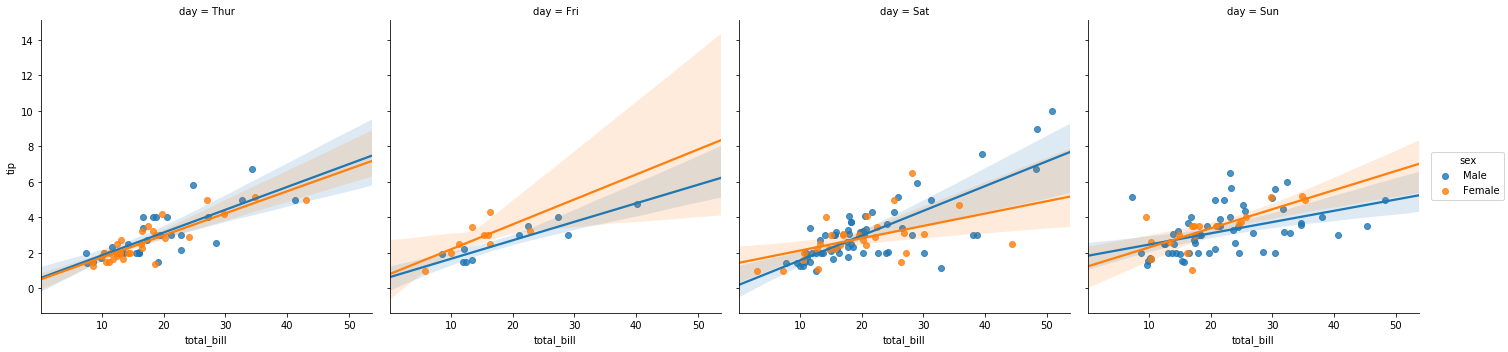

In [87]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex')

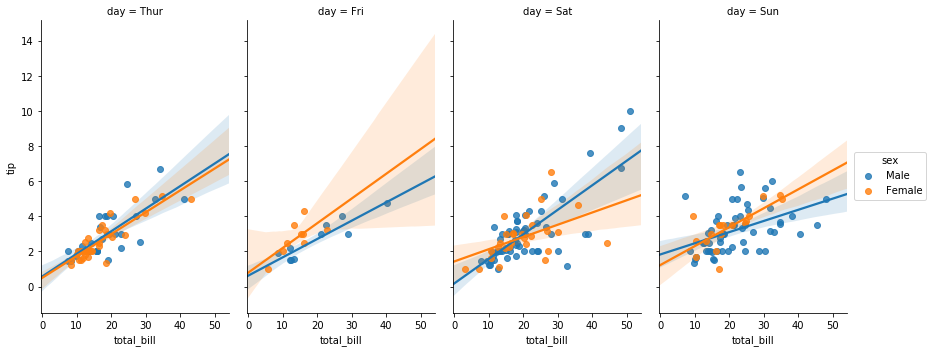

In [88]:
sns.lmplot(x='total_bill',y='tip',data=tips,col='day',hue='sex',aspect=0.6)

# Style and Colour

In [89]:
import seaborn as sns
%matplotlib inline
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


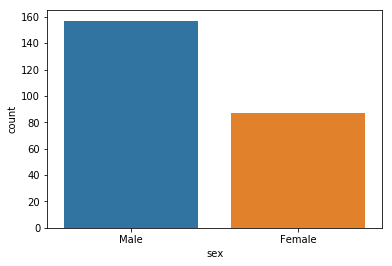

In [90]:
sns.countplot(x='sex',data=tips)

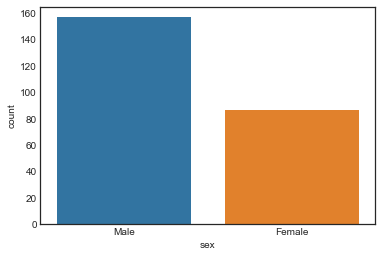

In [91]:
sns.set_style('white') #can set the style of plots for the rest of the code
sns.countplot(x='sex',data=tips)

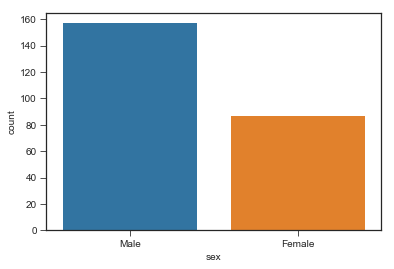

In [92]:
sns.set_style('ticks') #can set the style of plots for the rest of the code
sns.countplot(x='sex',data=tips)

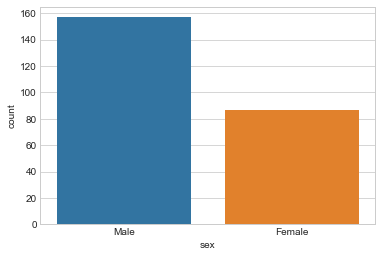

In [93]:
sns.set_style('whitegrid') #can set the style of plots for the rest of the code
sns.countplot(x='sex',data=tips)

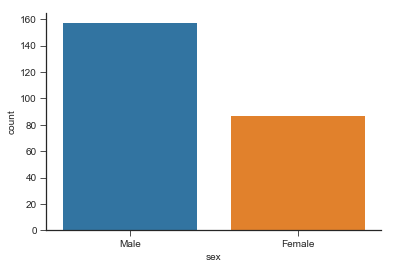

In [95]:
sns.set_style('ticks') #can set the style of plots for the rest of the code
sns.countplot(x='sex',data=tips)
sns.despine() #removes lines completing the square for the grid

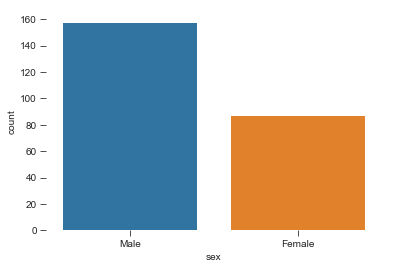

In [96]:
sns.set_style('ticks') #can set the style of plots for the rest of the code
sns.countplot(x='sex',data=tips)
sns.despine(left=True,bottom=True) #removes lines completing the square for the grid

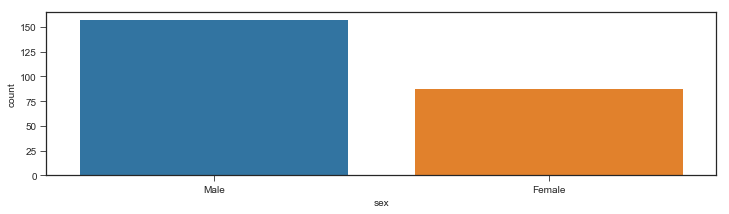

In [98]:
plt.figure(figsize=(12,3)) #this overrides seaborn defaults
sns.countplot(x='sex',data=tips)

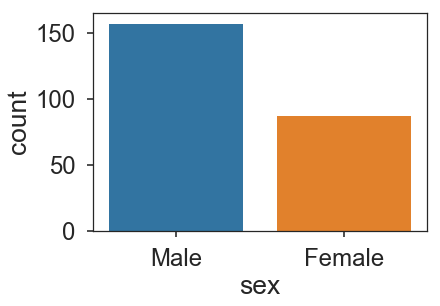

In [102]:
sns.set_context('poster',font_scale=1.5) #seaborn allows for some standard uses like notebook, poster, talk etc for export
sns.countplot(x='sex',data=tips)

In [107]:
sns.set_context('notebook') #resetting context

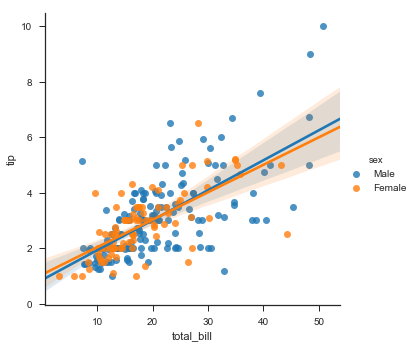

In [108]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex')

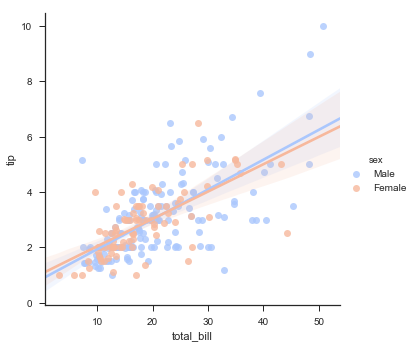

In [109]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='coolwarm') 
#colormaps https://matplotlib.org/examples/color/colormaps_reference.html

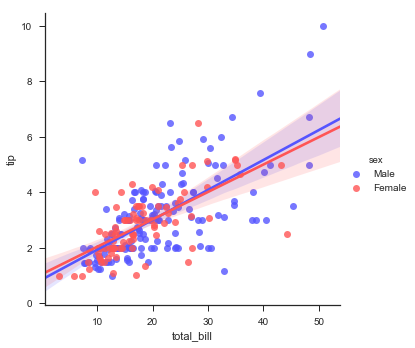

In [110]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='sex',palette='seismic') 
#colormaps https://matplotlib.org/examples/color/colormaps_reference.html